In [3]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import vectorbt as vbt
from datetime import datetime
import ccxt
import pandas as pd
import talib 
import vectorbt as vbt
import pandas_ta as ta


In [118]:

exchange = ccxt.binance()
symbol = 'BTC/USDT'
timeframe = '1d'
limit = 1000



In [119]:
ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])


In [ ]:
df= yf.download()

In [120]:
df

,timestamp,open,high,low,close,volume
0,1589500800000,9791.97,9845.62,9150.00,9316.42,115890.761516
1,1589587200000,9315.96,9588.00,9220.00,9381.27,59587.627862
2,1589673600000,9380.81,9888.00,9322.10,9680.04,68647.764323
3,1589760000000,9681.11,9950.00,9464.23,9733.93,82006.603583
4,1589846400000,9733.93,9897.21,9474.00,9775.53,78539.760454
...,...,...,...,...,...,...
995,1675468800000,23431.90,23587.78,23253.96,23326.84,166126.472950
996,1675555200000,23327.66,23433.33,22743.00,22932.91,209251.339170
997,1675641600000,22932.91,23158.25,22628.13,22762.52,265371.606900
998,1675728000000,22762.52,23350.25,22745.78,23240.46,308006.724820


In [121]:
df["timestamp"] = pd.to_datetime(df['timestamp'], unit='ms')
df.reset_index(inplace=True)

In [122]:
df

,index,timestamp,open,high,low,close,volume
0,0,2020-05-15,9791.97,9845.62,9150.00,9316.42,115890.761516
1,1,2020-05-16,9315.96,9588.00,9220.00,9381.27,59587.627862
2,2,2020-05-17,9380.81,9888.00,9322.10,9680.04,68647.764323
3,3,2020-05-18,9681.11,9950.00,9464.23,9733.93,82006.603583
4,4,2020-05-19,9733.93,9897.21,9474.00,9775.53,78539.760454
...,...,...,...,...,...,...,...
995,995,2023-02-04,23431.90,23587.78,23253.96,23326.84,166126.472950
996,996,2023-02-05,23327.66,23433.33,22743.00,22932.91,209251.339170
997,997,2023-02-06,22932.91,23158.25,22628.13,22762.52,265371.606900
998,998,2023-02-07,22762.52,23350.25,22745.78,23240.46,308006.724820


In [123]:
df=df.set_index('timestamp')

In [124]:
df.ta.macd(append=True)
df['macd_trend']= df.MACD_12_26_9 > df.MACDs_12_26_9

In [125]:
df[df['macd_trend']==True]

,index,open,high,low,close,volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_trend
timestamp,,,,,,,,,,
2020-07-07,53,9342.47,9379.42,9203.00,9257.39,34587.336678,-63.195992,7.147070,-70.343062,True
2020-07-08,54,9257.40,9470.00,9231.00,9436.06,56140.517781,-40.400935,23.953702,-64.354637,True
2020-07-09,55,9436.06,9440.79,9160.00,9232.43,48044.450645,-38.325138,20.823599,-59.148737,True
2020-07-10,56,9232.42,9317.48,9125.00,9288.34,38295.494006,-31.801992,21.877396,-53.679388,True
2020-07-11,57,9288.34,9299.28,9178.25,9234.03,22561.366000,-30.661270,18.414495,-49.075764,True
...,...,...,...,...,...,...,...,...,...,...
2023-01-25,985,22631.94,23816.73,22300.00,23060.94,346042.832230,1502.307292,229.030599,1273.276693,True
2023-01-26,986,23060.42,23282.47,22850.01,23009.65,288924.435810,1494.362818,176.868900,1317.493918,True
2023-01-27,987,23009.65,23500.00,22534.88,23074.16,280833.863150,1476.254836,127.008735,1349.246102,True


In [126]:
df.ta.rsi(append=True)

timestamp
2020-05-15          NaN
2020-05-16          NaN
2020-05-17          NaN
2020-05-18          NaN
2020-05-19          NaN
                ...    
2023-02-04    67.912715
2023-02-05    62.181631
2023-02-06    59.829764
2023-02-07    63.948704
2023-02-08    58.327776
Name: RSI_14, Length: 1000, dtype: float64

In [127]:
df.loc[df['RSI_14']>70,'overbought']= 1
df.loc[df['RSI_14']<30,'oversold']= 1
df.loc[df['RSI_14']>50,'RSI_trend']= 1
df.loc[df['RSI_14']<50,'RSI_trend']=-1


In [128]:

signaled=df[df['macd_trend'].shift(1)!= df['macd_trend']].iloc[2:]
signaled

,index,open,high,low,close,volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_trend,RSI_14,overbought,oversold,RSI_trend
timestamp,,,,,,,,,,,,,,
2020-07-17,63,9133.72,9186.83,9089.81,9154.32,28054.358741,-34.867272,-1.274380,-33.592892,False,45.895625,NaN,NaN,-1.0
2020-07-19,65,9170.30,9232.27,9101.35,9208.99,26052.019417,-33.370394,0.561435,-33.931828,True,48.246524,NaN,NaN,-1.0
2020-07-20,66,9208.99,9221.52,9131.00,9160.78,35458.764082,-34.784012,-0.681747,-34.102265,False,46.295490,NaN,NaN,-1.0
2020-07-21,67,9160.78,9437.73,9152.80,9390.00,60413.582486,-17.209793,13.513978,-30.723771,True,55.508050,NaN,NaN,1.0
2020-08-11,88,11892.90,11935.00,11125.00,11392.08,90748.284634,538.897681,-6.373639,545.271321,False,59.421387,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19,948,16739.00,16815.99,16256.30,16438.88,179094.283050,-117.633646,-32.551248,-85.082398,False,40.511459,NaN,NaN,-1.0
2022-12-26,955,16832.11,16944.52,16791.00,16919.39,124564.006560,-97.140485,6.957783,-104.098268,True,48.603020,NaN,NaN,-1.0
2022-12-28,957,16706.06,16785.19,16465.33,16547.31,193037.565770,-120.794318,-13.380013,-107.414306,False,42.166642,NaN,NaN,-1.0


In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
signaled['return']=signaled['close'].pct_change().shift(-1)
signaled

,index,open,high,low,close,volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_trend,RSI_14,overbought,oversold,RSI_trend,return
timestamp,,,,,,,,,,,,,,,
2020-07-17,63,9133.72,9186.83,9089.81,9154.32,28054.358741,-34.867272,-1.274380,-33.592892,False,45.895625,NaN,NaN,-1.0,0.005972
2020-07-19,65,9170.30,9232.27,9101.35,9208.99,26052.019417,-33.370394,0.561435,-33.931828,True,48.246524,NaN,NaN,-1.0,-0.005235
2020-07-20,66,9208.99,9221.52,9131.00,9160.78,35458.764082,-34.784012,-0.681747,-34.102265,False,46.295490,NaN,NaN,-1.0,0.025022
2020-07-21,67,9160.78,9437.73,9152.80,9390.00,60413.582486,-17.209793,13.513978,-30.723771,True,55.508050,NaN,NaN,1.0,0.213214
2020-08-11,88,11892.90,11935.00,11125.00,11392.08,90748.284634,538.897681,-6.373639,545.271321,False,59.421387,NaN,NaN,1.0,-0.053262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19,948,16739.00,16815.99,16256.30,16438.88,179094.283050,-117.633646,-32.551248,-85.082398,False,40.511459,NaN,NaN,-1.0,0.029230
2022-12-26,955,16832.11,16944.52,16791.00,16919.39,124564.006560,-97.140485,6.957783,-104.098268,True,48.603020,NaN,NaN,-1.0,-0.021991
2022-12-28,957,16706.06,16785.19,16465.33,16547.31,193037.565770,-120.794318,-13.380013,-107.414306,False,42.166642,NaN,NaN,-1.0,0.007728


In [131]:
# clean data remove NaN data at last data
signaled=signaled.iloc[:-1]
signaled

,index,open,high,low,close,volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_trend,RSI_14,overbought,oversold,RSI_trend,return
timestamp,,,,,,,,,,,,,,,
2020-07-17,63,9133.72,9186.83,9089.81,9154.32,28054.358741,-34.867272,-1.274380,-33.592892,False,45.895625,NaN,NaN,-1.0,0.005972
2020-07-19,65,9170.30,9232.27,9101.35,9208.99,26052.019417,-33.370394,0.561435,-33.931828,True,48.246524,NaN,NaN,-1.0,-0.005235
2020-07-20,66,9208.99,9221.52,9131.00,9160.78,35458.764082,-34.784012,-0.681747,-34.102265,False,46.295490,NaN,NaN,-1.0,0.025022
2020-07-21,67,9160.78,9437.73,9152.80,9390.00,60413.582486,-17.209793,13.513978,-30.723771,True,55.508050,NaN,NaN,1.0,0.213214
2020-08-11,88,11892.90,11935.00,11125.00,11392.08,90748.284634,538.897681,-6.373639,545.271321,False,59.421387,NaN,NaN,1.0,-0.053262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,923,16603.11,16812.63,16458.05,16598.95,206565.923460,-827.498120,7.858153,-835.356273,True,40.272238,NaN,NaN,-1.0,-0.009643
2022-12-19,948,16739.00,16815.99,16256.30,16438.88,179094.283050,-117.633646,-32.551248,-85.082398,False,40.511459,NaN,NaN,-1.0,0.029230
2022-12-26,955,16832.11,16944.52,16791.00,16919.39,124564.006560,-97.140485,6.957783,-104.098268,True,48.603020,NaN,NaN,-1.0,-0.021991


In [132]:
signaled=signaled[['close','MACD_12_26_9','MACDh_12_26_9','MACDs_12_26_9','macd_trend','RSI_14','overbought','oversold','RSI_trend','return']]

In [133]:
signaled

,close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_trend,RSI_14,overbought,oversold,RSI_trend,return
timestamp,,,,,,,,,,
2020-07-17,9154.32,-34.867272,-1.274380,-33.592892,False,45.895625,NaN,NaN,-1.0,0.005972
2020-07-19,9208.99,-33.370394,0.561435,-33.931828,True,48.246524,NaN,NaN,-1.0,-0.005235
2020-07-20,9160.78,-34.784012,-0.681747,-34.102265,False,46.295490,NaN,NaN,-1.0,0.025022
2020-07-21,9390.00,-17.209793,13.513978,-30.723771,True,55.508050,NaN,NaN,1.0,0.213214
2020-08-11,11392.08,538.897681,-6.373639,545.271321,False,59.421387,NaN,NaN,1.0,-0.053262
...,...,...,...,...,...,...,...,...,...,...
2022-11-24,16598.95,-827.498120,7.858153,-835.356273,True,40.272238,NaN,NaN,-1.0,-0.009643
2022-12-19,16438.88,-117.633646,-32.551248,-85.082398,False,40.511459,NaN,NaN,-1.0,0.029230
2022-12-26,16919.39,-97.140485,6.957783,-104.098268,True,48.603020,NaN,NaN,-1.0,-0.021991


In [134]:
signaled.loc[signaled['return']>0,'y']=1
signaled.loc[signaled['return']<0,'y']=-1
signaled.loc[signaled['return']==0,'y']=0

/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_46715/2126171417.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
signaled = signaled.fillna(0)
signaled

,close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_trend,RSI_14,overbought,oversold,RSI_trend,return,y
timestamp,,,,,,,,,,,
2020-07-17,9154.32,-34.867272,-1.274380,-33.592892,False,45.895625,0.0,0.0,-1.0,0.005972,1.0
2020-07-19,9208.99,-33.370394,0.561435,-33.931828,True,48.246524,0.0,0.0,-1.0,-0.005235,-1.0
2020-07-20,9160.78,-34.784012,-0.681747,-34.102265,False,46.295490,0.0,0.0,-1.0,0.025022,1.0
2020-07-21,9390.00,-17.209793,13.513978,-30.723771,True,55.508050,0.0,0.0,1.0,0.213214,1.0
2020-08-11,11392.08,538.897681,-6.373639,545.271321,False,59.421387,0.0,0.0,1.0,-0.053262,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,16598.95,-827.498120,7.858153,-835.356273,True,40.272238,0.0,0.0,-1.0,-0.009643,-1.0
2022-12-19,16438.88,-117.633646,-32.551248,-85.082398,False,40.511459,0.0,0.0,-1.0,0.029230,1.0
2022-12-26,16919.39,-97.140485,6.957783,-104.098268,True,48.603020,0.0,0.0,-1.0,-0.021991,-1.0


In [136]:
signaled[signaled['overbought']==1]

,close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_trend,RSI_14,overbought,oversold,RSI_trend,return,y
timestamp,,,,,,,,,,,
2020-12-16,21335.52,706.763939,55.103725,651.660214,True,70.825212,1.0,0.0,1.0,0.595988,1.0


In [137]:
signaled[signaled['oversold']==1]

,close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_trend,RSI_14,overbought,oversold,RSI_trend,return,y
timestamp,,,,,,,,,,,
2022-01-21,36445.31,-2036.528018,-233.781978,-1802.74604,False,22.358685,0.0,1.0,-1.0,0.047236,1.0


In [138]:
signaled.count()

close            66
MACD_12_26_9     66
MACDh_12_26_9    66
MACDs_12_26_9    66
macd_trend       66
RSI_14           66
overbought       66
oversold         66
RSI_trend        66
return           66
y                66
dtype: int64

In [139]:
X_train = signaled.iloc[:30,1:-2]
y_train = signaled.iloc[:30,-1]
X_test = signaled.iloc[30:60,1:-2]
y_test = signaled.iloc[30:60,-1]

In [140]:
# turning parameter 
from sklearn.metrics import mean_squared_error

# add return y_predict
def rf(X_train,y_train,X_test,y_test,
      n_estimators=100,criterion='gini',max_depth=3):
    rf = RandomForestClassifier(n_estimators = n_estimators,
                              criterion=criterion,
                              max_depth=max_depth)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    return mse,y_pred

In [141]:
def grid_rf(X_train,y_train,X_test,y_test,
           n_estimator_choice,criterion_choice,depth):
    results_list = []
    for i in n_estimator_choice:
        for j in criterion_choice:
            for k in depth:
                results,y_pred = rf(X_train,y_train,X_test,y_test,n_estimators=i,criterion=j,max_depth=k)
                compare =    pd.DataFrame(y_test)
                compare['predict'] = y_pred
                
                direction = (compare.product(1)>0).sum()
                
                results_list.append([i,j,k,results,direction])
    return results_list

In [142]:
n_estimator_values =[100,200,500]
depth_values = [3,4,5]
criterion_values = ['gini','entropy']
grid_rf(X_train,y_train,X_test,y_test,n_estimator_choice=n_estimator_values,
        criterion_choice=criterion_values,depth=depth_values)

[[100, 'gini', 3, 1.8666666666666667, 16],
 [100, 'gini', 4, 2.0, 15],
 [100, 'gini', 5, 2.1333333333333333, 14],
 [100, 'entropy', 3, 2.1333333333333333, 14],
 [100, 'entropy', 4, 2.1333333333333333, 14],
 [100, 'entropy', 5, 1.8666666666666667, 16],
 [200, 'gini', 3, 2.0, 15],
 [200, 'gini', 4, 1.8666666666666667, 16],
 [200, 'gini', 5, 2.1333333333333333, 14],
 [200, 'entropy', 3, 2.0, 15],
 [200, 'entropy', 4, 2.2666666666666666, 13],
 [200, 'entropy', 5, 2.1333333333333333, 14],
 [500, 'gini', 3, 2.0, 15],
 [500, 'gini', 4, 2.1333333333333333, 14],
 [500, 'gini', 5, 2.0, 15],
 [500, 'entropy', 3, 2.0, 15],
 [500, 'entropy', 4, 2.0, 15],
 [500, 'entropy', 5, 2.1333333333333333, 14]]

In [143]:
grid_df_rf = pd.DataFrame(grid_rf(X_train,y_train,X_test,y_test,n_estimator_choice=n_estimator_values,
        criterion_choice=criterion_values,depth=depth_values))
grid_df_rf.columns = ['n_estimators','method','depth','mse','accuracy']
grid_df_rf.sort_values(['accuracy','mse'],ascending=[False,True])

,n_estimators,method,depth,mse,accuracy
0,100,gini,3,1.866667,16
2,100,gini,5,2.000000,15
4,100,entropy,4,2.000000,15
5,100,entropy,5,2.000000,15
7,200,gini,4,2.000000,15
10,200,entropy,4,2.000000,15
12,500,gini,3,2.000000,15
13,500,gini,4,2.000000,15
14,500,gini,5,2.000000,15
15,500,entropy,3,2.000000,15


In [144]:
result_turning = grid_df_rf.sort_values(['accuracy','mse'],ascending=[False,True]).iloc[0]

In [145]:
rf_turning =RandomForestClassifier(
    n_estimators=result_turning.n_estimators,
    max_depth=result_turning.depth,
    criterion=result_turning.method,
    random_state=3)
rf_turning.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, random_state=3)

In [146]:
y_pred_turning = rf_turning.predict(X_test)

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



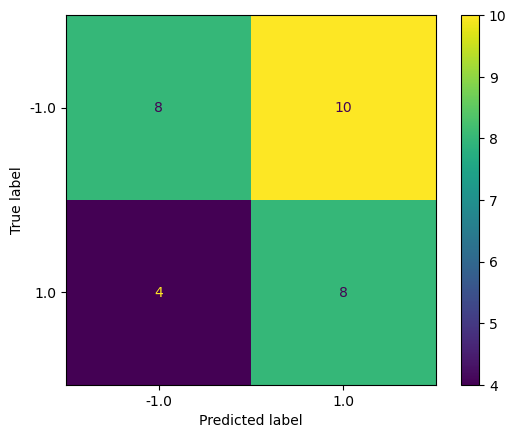

In [147]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_turning,X_test,y_test)

In [148]:
X_live = signaled.iloc[60:,1:-2]

In [149]:
X_live

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_trend,RSI_14,overbought,oversold,RSI_trend
timestamp,,,,,,,,
2022-11-08,155.165856,-106.104298,261.270154,False,36.089370,0.0,0.0,-1.0
2022-11-24,-827.498120,7.858153,-835.356273,True,40.272238,0.0,0.0,-1.0
2022-12-19,-117.633646,-32.551248,-85.082398,False,40.511459,0.0,0.0,-1.0
2022-12-26,-97.140485,6.957783,-104.098268,True,48.603020,0.0,0.0,-1.0
2022-12-28,-120.794318,-13.380013,-107.414306,False,42.166642,0.0,0.0,-1.0
2023-01-03,-120.741354,2.437782,-123.179136,True,45.850650,0.0,0.0,-1.0


In [150]:
turning_test_live = signaled[60:].copy()
# use only last 50 data to check is ml accuracy 
turning_test_live['signal']=rf_turning.predict(X_live)

In [151]:
# change signal ml from -1 1. to True False cause will use to vectorbt backtest
turning_test_live['signal']=turning_test_live['signal'].apply(lambda x:True if x==1 else False)
turning_test_live

,close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,macd_trend,RSI_14,overbought,oversold,RSI_trend,return,y,signal
timestamp,,,,,,,,,,,,
2022-11-08,18547.23,155.165856,-106.104298,261.270154,False,36.089370,0.0,0.0,-1.0,-0.105044,-1.0,True
2022-11-24,16598.95,-827.498120,7.858153,-835.356273,True,40.272238,0.0,0.0,-1.0,-0.009643,-1.0,False
2022-12-19,16438.88,-117.633646,-32.551248,-85.082398,False,40.511459,0.0,0.0,-1.0,0.029230,1.0,True
2022-12-26,16919.39,-97.140485,6.957783,-104.098268,True,48.603020,0.0,0.0,-1.0,-0.021991,-1.0,True
2022-12-28,16547.31,-120.794318,-13.380013,-107.414306,False,42.166642,0.0,0.0,-1.0,0.007728,1.0,True
2023-01-03,16675.18,-120.741354,2.437782,-123.179136,True,45.850650,0.0,0.0,-1.0,0.368870,1.0,True


In [164]:
turning_test_live.iloc[0,]

close              18547.23
MACD_12_26_9     155.165856
MACDh_12_26_9   -106.104298
MACDs_12_26_9    261.270154
macd_trend            False
RSI_14             36.08937
overbought              0.0
oversold                0.0
RSI_trend              -1.0
return            -0.105044
y                      -1.0
signal                 True
Name: 2022-11-08 00:00:00, dtype: object

In [170]:
time_predict =turning_test_live.index[0]

In [171]:
#2023-01-24 15:00:00
df_turning_predict=df.loc[time_predict:,:'close']

In [172]:
df_turning_predict

,index,open,high,low,close
timestamp,,,,,
2022-11-08,907,20590.67,20700.88,17166.83,18547.23
2022-11-09,908,18545.38,18587.76,15588.00,15922.81
2022-11-10,909,15922.68,18199.00,15754.26,17601.15
2022-11-11,910,17602.45,17695.00,16361.60,17070.31
2022-11-12,911,17069.98,17119.10,16631.39,16812.08
...,...,...,...,...,...
2023-02-04,995,23431.90,23587.78,23253.96,23326.84
2023-02-05,996,23327.66,23433.33,22743.00,22932.91
2023-02-06,997,22932.91,23158.25,22628.13,22762.52


In [173]:
df_turning_predict =  df_turning_predict.join(turning_test_live['signal'])


In [174]:
df_turning_predict =df_turning_predict.fillna(method='ffill')

In [175]:
df_turning_predict

,index,open,high,low,close,signal
timestamp,,,,,,
2022-11-08,907,20590.67,20700.88,17166.83,18547.23,True
2022-11-09,908,18545.38,18587.76,15588.00,15922.81,True
2022-11-10,909,15922.68,18199.00,15754.26,17601.15,True
2022-11-11,910,17602.45,17695.00,16361.60,17070.31,True
2022-11-12,911,17069.98,17119.10,16631.39,16812.08,True
...,...,...,...,...,...,...
2023-02-04,995,23431.90,23587.78,23253.96,23326.84,True
2023-02-05,996,23327.66,23433.33,22743.00,22932.91,True
2023-02-06,997,22932.91,23158.25,22628.13,22762.52,True


In [176]:
signal_vectorbt_ml_turning = df_turning_predict.ta.tsignals(df_turning_predict.signal,
                                           asbool=True,append=True)

signal_vectorbt_ml_turning.loc[signal_vectorbt_ml_turning['TS_Trades']!=0]

,TS_Trends,TS_Trades,TS_Entries,TS_Exits
timestamp,,,,
2022-11-24,False,-1,False,True
2022-12-19,True,1,True,False


In [177]:
port_ml_turning = vbt.Portfolio.from_signals(df_turning_predict.open,
                                           entries=signal_vectorbt_ml_turning.TS_Entries,
                                           exits=signal_vectorbt_ml_turning.TS_Exits,
                                           freq='D',
                                           size=0.25,

                                            direction=0)
port_ml_turning.plot().show()

In [178]:
port_ml_turning.stats()

Start                         2022-11-08 00:00:00
End                           2023-02-08 00:00:00
Period                           93 days 00:00:00
Start Value                                 100.0
End Value                              138.851903
Total Return [%]                        38.851903
Benchmark Return [%]                    12.878406
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                         4.131048
Max Drawdown Duration            10 days 00:00:00
Total Trades                                    1
Total Closed Trades                             0
Total Open Trades                               1
Open Trade PnL                          38.851903
Win Rate [%]                                  NaN
Best Trade [%]                                NaN
Worst Trade [%]                               NaN
Avg Winning Trade [%]                         NaN
Avg Losing Trade [%]                          NaN
